In [50]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# to find the extinction probability
from scipy.optimize import fsolve

# Branching Processes

Today we'll look at the evolution of the size of a population that follows a branching process. We will look at different offspring distributions and then look at a few samples of the process. Some questions we can ask ourselves are: What do common paths of the branching process look like? Do they fluctuate a lot? If the extinction probability is 1, how fast do the processes usually die out? If the extinction probability is not 1, how soon do populations that go extinct usually die out? How big is typically the population size of those processes that do not die out after a certain number of generations?

## Binomial offspring distribution

Let us first look at the tree for different binomial distributions. For this we need to define parameters $p$ and $n$, and the probability that the offspring of one element is $k$ is then $\binom{n}{k} p^k (1-p)^{n-k}$ for $k = 0, \dots, n$. You will see that the extinction probability and the speed of extinction not only depend on the expected value of the offspring size. This is to be expected as the extinction probability can be computed by looking for a fixed point of the probability generation function. This extinction probability is also printed above the path.

For this and the other cells below, you can vary the parameters of the distribution, the parameter $g$ that determines for how many generations we simulate the process, and the number of samples we take, this is the parameter $rep$. 

Approximate extinction probability: 0.83618.
Approximate expected size of the offspring: 1.08.
Proportion of samples extinct after 20 generations: 0.84.
Average time of extinction for processes extinct before the 20th generation: 3.0595238095238093.


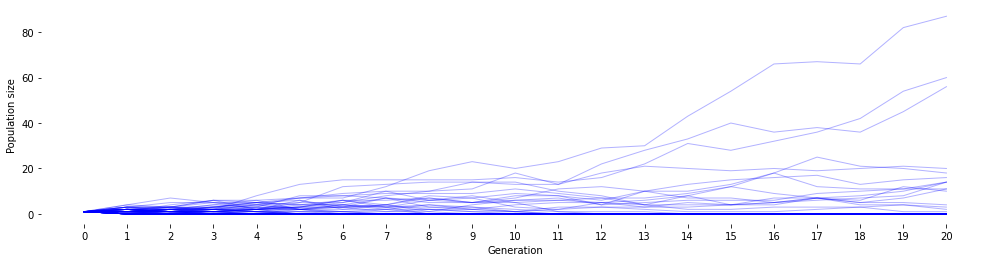

In [55]:
# parameters for the binomial distribution
n = 8
p = 0.135

# number of generations
g = 20

# number of times we run the simulation, 
# i.e. number of times we sample the branching process
rep = 100



# here we save the extinction probability
genfun = lambda x: (1 - p + p*x)**n - x
ext = round(fsolve(genfun, 0.5)[0],6)

# here we save the expected size of the offspring of one element
exp = round(n*p,6)

# we will use this to count the number of realizations that survived until time g
S = 0

# now we set up our figure
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Population size')
plt.xlabel('Generation')
plt.xticks(np.arange(0, g + 1, step=max(1,np.floor(g/20))));
   

# We will also save the time until the process dies
Y = np.zeros(rep)

for r in range(0,rep):
    
    # Here we set up the variables that we will use to save the size of our branching process
    X = [0]*(g+1)
    # We have one particle initially
    X[0] = 1
    
    for i in range(1,g+1):
        for j in range(0,X[i-1]):
            # insert the offspring distribution here
            X[i] = X[i] + np.random.binomial(n,p)
        if X[i] == 0:
            Y[r] = i
            break
    
    S = S + (X[g-1]>  0) 
    ax.plot(X, linewidth = 1, alpha = 0.3, color = "blue");
    

print("Approximate extinction probability: " + str(ext) + ".")

print("Approximate expected size of the offspring: " + str(exp) + ".")

print("Proportion of samples extinct after " + str(g) + " generations: " + str((rep-S)/rep) + ".")


print("Average time of extinction for processes extinct before the " + str(g) + "th generation: " +
      str(np.average(Y[Y>0])) + ".")



## Geometric offspring distribution

Let's now look at the geometric offspring distribution. Here we only need to define a parameter $p$, the size of an offspring is then equal to $k$ with probability $p(1-p)^k$, for $k = 0, 1, 2, \dots$. You can compare how the population evolves for the geometric and the binomial distribution, for similar extinction probabilities. To get similar extinction probabilities you will need to proceed by trial and error, i.e. adjusting $p$ here and $n$ and $p$ above to get the value that you want.

Approximate extinction probability: 0.834862.
Approximate expected size of the offspring: 1.197802.
Proportion of samples extinct after 20 generations: 0.83
Average time of extinction for processes extinct before the 20th generation: 1.963855421686747


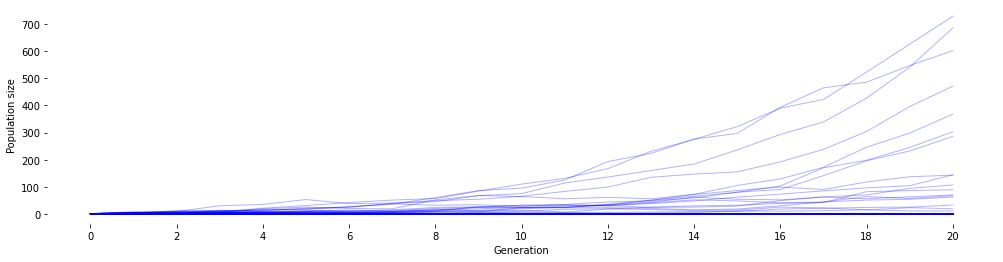

In [52]:
# parameters for the geometric distribution
p = 0.455

# number of generations
g = 20

# number of times we run the simulation, 
# i.e. number of times we sample the branching process
rep = 100



# here we save the extinction probability
ext = round(min(1,p/(1-p)),6)

# here we save the expected size of the offspring of one element
exp = np.round((1-p)/p,6)

# we will use this to count the number of realizations that survived until time g
S = 0

# now we set up our figure
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Population size')
plt.xlabel('Generation')
plt.xticks(np.arange(0, g + 1, step=max(1,np.floor(g/10))));  

# We will also save the time until the process dies
Y = np.zeros(rep)

for r in range(0,rep):
    
    # Here we set up the variables that we will use to save the size of our branching process
    X = [0]*(g+1)
    # We have one particle initially
    X[0] = 1
    
    for i in range(1,g+1):
        for j in range(0,X[i-1]):
            # insert the offspring distribution here
            X[i] = int(X[i] + np.random.geometric(p) - 1)
        if X[i] == 0:
            Y[r] = i
            break
            
    S = S + (X[g-1]>0) 
    ax.plot(X, linewidth = 1, alpha = 0.3, color = "blue");
  
print("Approximate extinction probability: " + str(ext) + ".")

print("Approximate expected size of the offspring: " + str(exp) + ".")
    
print("Proportion of samples extinct after " + str(g) + " generations: " + str((rep-S)/rep) + ".")

print("Average time of extinction for processes extinct before the " + str(g) + "th generation: " +
      str(np.average(Y[Y>0])) + ".")

## Poisson offspring distribution

As a final distribution we look at the Poisson offspring distribution. Here we need to define a parameter $\mu$, and the probability that the offspring of one element is of size $k$ is then $e^{-\mu} \frac{\mu^k}{k!}$. Again, feel free to compare the paths to those corresponding to the geometric and binomial distribution.

Approximate extinction probability: 0.839538.
Expected size of the offspring: 1.09.
Proportion of samples extinct after 20 generations: 0.73.
Average time of extinction for processes extinct before the 20th generation: 3.2837837837837838.


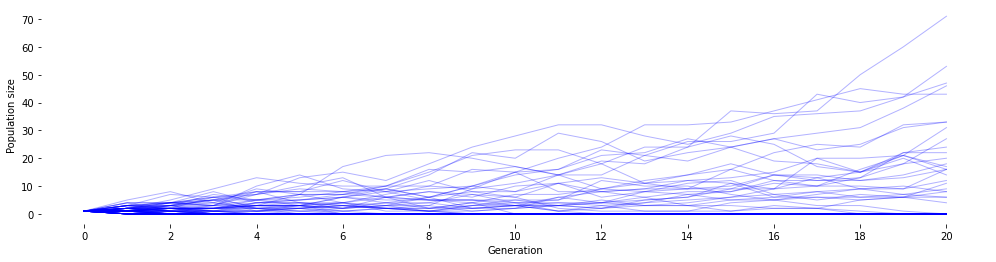

In [56]:
# parameters for the Poisson distribution
mu = 1.09

# number of generations
g = 20

# number of times we run the simulation, 
# i.e. number of times we sample the branching process
rep = 100



# here we save the extinction probability
genfun = lambda x: np.e**(mu*(x-1)) - x
ext = round(fsolve(genfun, 0.5)[0],6)

# here we save the expected size of the offspring of one element
exp = np.round(mu,6)

# we will use this to count the number of realizations that survived until time g
S = 0

# now we set up our figure
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Population size')
plt.xlabel('Generation')
plt.xticks(np.arange(0, g + 1, step=max(1,np.floor(g/10)))); 

# We will also save the time until the process dies
Y = np.zeros(rep)

for r in range(0,rep):
    
    # Here we set up the variables that we will use to save the size of our branching process
    X = [0]*(g+1)
    # We have one particle initially
    X[0] = 1
    
    for i in range(1,g+1):
        for j in range(0,X[i-1]):
            # insert the offspring distribution here
            X[i] = int(X[i] + np.random.poisson(mu))
        if X[i] == 0:
            Y[r] = i
            break
            
    S = S + (X[g-1]>0) 
    ax.plot(X, linewidth = 1, alpha = 0.3, color = "blue");
    

print("Approximate extinction probability: " + str(ext) + ".")
    
print("Expected size of the offspring: " + str(exp) + ".")
 
print("Proportion of samples extinct after " + str(g) + " generations: " + str((rep-S)/rep) + ".")

print("Average time of extinction for processes extinct before the " + str(g) + "th generation: " +
      str(np.average(Y[Y>0])) + ".")

## Assignment

Please post an observation that you made on the corresponding discussion site on bcourses. You can either answer a question from the introduction, or compare the different processes, and reflect on the reason for the difference, or post about something else that stood out to you.